In [5]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
df['tip_size'] = round(df['tip'] / df['total_bill'], 2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_size
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [19]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

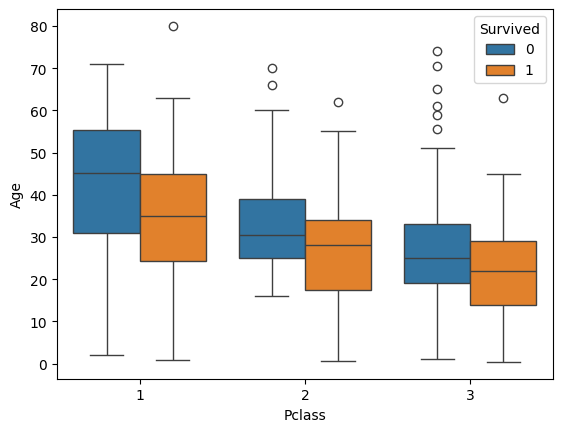

In [23]:
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')

In [27]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [29]:
df_mod = df.drop(columns={'Name', 'Ticket', 'Cabin'}).dropna()
df_mod

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S


In [32]:
target = df_mod.Survived
df_features = df_mod.drop(columns={'Survived'})

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
cat_features = df_features.select_dtypes(exclude='number').columns
cat_features


encoder = OrdinalEncoder()
df_features[cat_features] = encoder.fit_transform(df_features[cat_features]).astype('int')
df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [49]:
discrete_features = df_features.dtypes == int
discrete_features

Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [54]:
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)

<Axes: >

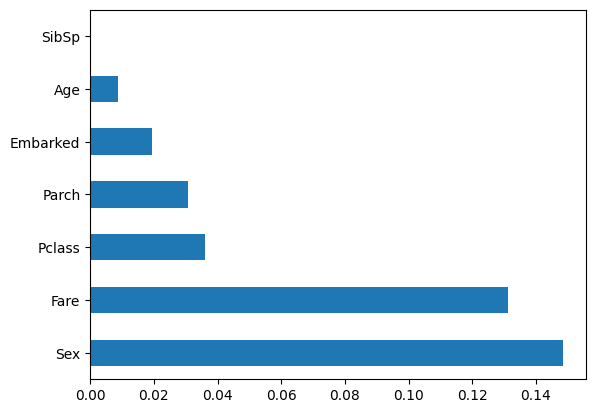

In [67]:
pd.Series(data=scores, index = df_features.columns).sort_values(ascending= False).plot.barh()